## Лабораторная работа №1 | Вариант 3

Выполнил: Ширяев Никита Алексеевич М8О-08Б-22

### 1. Numpy

In [120]:
import numpy as np

1. Создайте массив D размером 4x4, заполненный числами от 1 до 16. Используйте срезы, чтобы извлечь подмассив размером 2x2, начиная с элемента в строке 1 и столбце 1.

In [121]:
D = np.arange(1, 17).reshape((4, 4))
print(D)
print(D[1:3, 1:3], sep="\n")

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]]
[[ 6  7]
 [10 11]]


2. Создайте трехмерный массив a размером 4x3x2, заполненный случайными числами от 1 до 10. Найдите сумму всех элементов вдоль оси 1.

In [122]:
a = np.random.randint(1, 11, (4, 3, 2))
print(a)
np.sum(a, axis=1)

[[[10  9]
  [ 5  7]
  [ 1  4]]

 [[ 7  8]
  [ 2  6]
  [ 1  6]]

 [[ 9  9]
  [ 7  5]
  [ 6  9]]

 [[ 2  6]
  [10  2]
  [ 9 10]]]


array([[16, 20],
       [10, 20],
       [22, 23],
       [21, 18]])

3. Напишите функцию, которая принимает матрицу и производит нормировку её элементов (т.е. $A'_{ij} = A_{ij} / \sum_{i} \sum_{j} A_{ij}$)

In [123]:
def normalize_matrix(matrix):
    total_sum = np.sum(matrix)
    normalized_matrix = matrix / total_sum
    return normalized_matrix

4. Напишите функцию, которая принимает 3 трехмерных вектора $x, y, z$ и вычисляет объем пирамиды, образованной этими векторами (используйте смешанное произведение векторов)

In [124]:
def pyramid_volume(x, y, z):
    cross_product = np.cross(y, z)    
    mixed_product = np.dot(x, cross_product)    
    V = abs(mixed_product) / 6
    return V

5. Напишите функцию, которая принимает число N и строит матрицу NxN, с нулями внутри и единицами на границе.

In [125]:
def build_matrix(N):
    matrix = np.zeros((N, N), dtype=int)
    matrix[0, :] = 1
    matrix[-1, :] = 1
    matrix[:, 0] = 1
    matrix[:, -1] = 1
    return matrix

6. Создайте матрицу шахматную доску 8х8 используя функцию `tile`

In [126]:
def create_chessboard():
    base_pattern = np.array([[0, 1], 
                             [1, 0]])
    chessboard = np.tile(base_pattern, (4, 4))
    return chessboard

7. Как найти наиболее близкое значение (к заданному скаляру) в векторе?

In [127]:
def find_closest_val(vector, scalar):
    diff = np.abs(vector - scalar)
    index = np.argmin(diff)
    closest_val = vector[index]
    return closest_val

8. Создайте случайный вектор размером 10 и отсортируйте его

In [128]:
random_vector = np.random.rand(10)
np.sort(random_vector)

array([1.85707814e-04, 2.34893667e-03, 1.03068328e-01, 2.99379101e-01,
       4.40121922e-01, 4.49684344e-01, 4.75561193e-01, 5.27317348e-01,
       5.63551195e-01, 7.78511284e-01])

9. Создайте случайный вектор длиной 10 и замените максимальное значение в нем на 0

In [129]:
random_vector = np.random.rand(10)
index = np.argmax(random_vector)
print(random_vector)
random_vector[index] = 0
random_vector

[0.26979465 0.59616878 0.11004531 0.14019131 0.23696679 0.45108647
 0.25002742 0.15185294 0.17574788 0.74575698]


array([0.26979465, 0.59616878, 0.11004531, 0.14019131, 0.23696679,
       0.45108647, 0.25002742, 0.15185294, 0.17574788, 0.        ])

10. Даны 2 массива Х и Y, постройте матрицу Коши $C$ ($C_{ij} = \frac{1}{x_i - y_j}$)

In [130]:
def cauchy_matrix(X, Y):
    C = 1.0 / (X[:, np.newaxis] - Y[np.newaxis, :])
    return C

X = np.array([1, 2, 3])
Y = np.array([4, 5, 6])
cauchy_matrix(X, Y)

array([[-0.33333333, -0.25      , -0.2       ],
       [-0.5       , -0.33333333, -0.25      ],
       [-1.        , -0.5       , -0.33333333]])

### 2. Pandas

Представлено 2 датасета в формате CSV.

Найдите ответы на вопросы или выполните действия с предложенным датасетом

Файлы: `countries.csv`, `covid-country-data.csv`

In [131]:
import pandas as pd


data = pd.read_csv('data/countries.csv')
data.head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987
1,Albania,Europe,2877800.0,78.57,2.89,11803.431
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839
3,Andorra,Europe,77265.0,83.73,NaN,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495


1. Какое общее население планеты, согласно датасету?

In [132]:
data["population"].sum()

np.float64(7757980095.0)

2. Выведите страну с наименьшей продолжительностью жизни

In [133]:
data.loc[data["life_expectancy"] == data["life_expectancy"].min(), "location"]

38    Central African Republic
Name: location, dtype: object

3. Выведите страну с наибольшим ВВП на душу населения ('gdp_per_capita')

In [134]:
data.loc[data["gdp_per_capita"] == data["gdp_per_capita"].max(), "location"]

155    Qatar
Name: location, dtype: object

4. Заполните пропуски в 'life_expectancy' медианным значением и посчитайте среднюю продолжительность жизни

In [135]:
data["life_expectancy"] = data["life_expectancy"].fillna(data["life_expectancy"].median())
data["life_expectancy"].mean()

np.float64(73.55214285714285)

5. Выведите топ-15 стран по численности населения

In [136]:
data.sort_values(by="population", ascending=False).head(15)

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
41,China,Asia,1.439324e+09,76.91,4.34,15308.712
90,India,Asia,1.380004e+09,69.66,0.53,6426.674
199,United States,North America,3.310026e+08,78.86,2.77,54225.446
91,Indonesia,Asia,2.735236e+08,71.72,1.04,11188.744
145,Pakistan,Asia,2.208923e+08,67.27,0.60,5034.708
27,Brazil,South America,2.125594e+08,75.88,2.20,14103.452
141,Nigeria,Africa,2.061396e+08,54.69,NaN,5338.454
15,Bangladesh,Asia,1.646894e+08,72.59,0.80,3523.984
157,Russia,Europe,1.459345e+08,72.58,8.05,24765.954
125,Mexico,North America,1.289328e+08,75.05,1.38,17336.469


6. Среди стран, входящих в топ-25 по ВВП на душу населения (gdp_per_capita) выведите 5 стран с наименьшим населением

In [137]:
data.sort_values(by="gdp_per_capita", ascending=False).head(25).sort_values(by="population").head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita
162,San Marino,Europe,33938.0,84.97,3.80,56861.470
21,Bermuda,North America,62273.0,82.59,NaN,50669.315
37,Cayman Islands,North America,65720.0,83.92,NaN,49903.029
89,Iceland,Europe,341250.0,82.99,2.91,46482.958
29,Brunei,Asia,437483.0,75.86,2.70,71809.251


7. Соедините таблицы covid-country-data и countries

In [138]:
df_covid = pd.read_csv("data/covid-country-data.csv")
data.merge(df_covid, left_on="location", right_on="location", how="left")

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_cases,total_deaths,total_tests
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,38243.0,1409.0,NaN
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,9728.0,296.0,NaN
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,45158.0,1525.0,NaN
3,Andorra,Europe,77265.0,83.73,NaN,NaN,1199.0,53.0,NaN
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,2729.0,109.0,NaN
...,...,...,...,...,...,...,...,...,...
205,Vietnam,Asia,97338583.0,75.40,2.60,6171.884,1046.0,35.0,261004.0
206,Western Sahara,Africa,597330.0,70.26,NaN,NaN,766.0,1.0,NaN
207,Yemen,Asia,29825968.0,66.12,0.70,1479.147,1976.0,571.0,NaN
208,Zambia,Africa,18383956.0,63.89,2.00,3689.251,12415.0,292.0,NaN


8. Добавьте для всех стран добавьте колонку, в которой была бы отражена смертность на 1 млн человек населения (пропуски заполните средним значением)

In [139]:
df_normal = data.merge(df_covid, left_on="location", right_on="location", how="left")
df_normal["total_deaths"] = df_normal["total_deaths"].fillna(df_normal["total_deaths"].mean())
df_normal["death_per_million"] = df_normal["total_deaths"] / df_normal["population"] * 10**6
df_normal.head()

,location,continent,population,life_expectancy,hospital_beds_per_thousand,gdp_per_capita,total_cases,total_deaths,total_tests,death_per_million
0,Afghanistan,Asia,38928341.0,64.83,0.50,1803.987,38243.0,1409.0,NaN,36.194710
1,Albania,Europe,2877800.0,78.57,2.89,11803.431,9728.0,296.0,NaN,102.856349
2,Algeria,Africa,43851043.0,76.88,1.90,13913.839,45158.0,1525.0,NaN,34.776824
3,Andorra,Europe,77265.0,83.73,NaN,NaN,1199.0,53.0,NaN,685.950948
4,Angola,Africa,32866268.0,61.15,NaN,5819.495,2729.0,109.0,NaN,3.316470


In [140]:
covid_data = pd.read_csv('data/covid-country-data.csv')

In [141]:
covid_data.head()

,location,total_cases,total_deaths,total_tests
0,Afghanistan,38243.0,1409.0,NaN
1,Albania,9728.0,296.0,NaN
2,Algeria,45158.0,1525.0,NaN
3,Andorra,1199.0,53.0,NaN
4,Angola,2729.0,109.0,NaN


### 3. Визуализация

Используя библиотеки matplotlib/sns/plotly/pandas и набор данных представленный ранее визуализируйте

1. Сделайте круговую диаграмму, на которой были бы отражено число заболеваний COVID-19 по континентам

In [142]:
import plotly.graph_objs as go


df = df_normal.groupby("continent")["total_cases"].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Pie(labels=df["continent"],
                     values=df["total_cases"]))
fig

2. Постройте диаграмму, на которой в порядке убывания были бы отмечены число тестов на COVID-19 в России, Китае, США, Индии и Нигерии

In [143]:
df = df_normal[df_normal["location"].str.contains(r"Russia|China|United States|India|Nigeria", regex=True)][["location", "total_tests"]]  # Includes United States Virgin Islands cz idk wth but American tho
df = df.sort_values(by="total_tests", ascending=False).reset_index(drop=True)

fig = go.Figure()
fig.add_trace(go.Bar(x=df["location"],
                     y=df["total_tests"]))

3. Визуализируйте зависимость ВВП страны и случаев заболевания COVID-19

In [144]:
# These vals are completely independant.  I'd rather check
#  these vals at the axis of time and inside exactly one country
#  to visualise the dependency.  Simply matching GDP/illness does
#  not make any sense.  But ofc if it's just a task tho...
df = df_normal[["location", "population", "gdp_per_capita", "total_cases"]].dropna().sort_values(by="gdp_per_capita", ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x=df["location"],
                     y=df["gdp_per_capita"] * 10,  # Change value to be visible
                     name="GDP"))
fig.add_trace(go.Bar(x=df["location"],
                     y=df["total_cases"],
                     name="Sick"))
fig.update_layout(barmode="group")
fig

4. Постройте гистограмму распределения количества смертей на один миллион человек

In [145]:
df = df_normal[["location", "death_per_million"]].dropna().sort_values(by="death_per_million", ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x=df["location"],
                     y=df["death_per_million"],
                     name="GDP"))
fig

5. Постройте диаграмму отображающую среднюю продолжительность жизни в разных странах европы

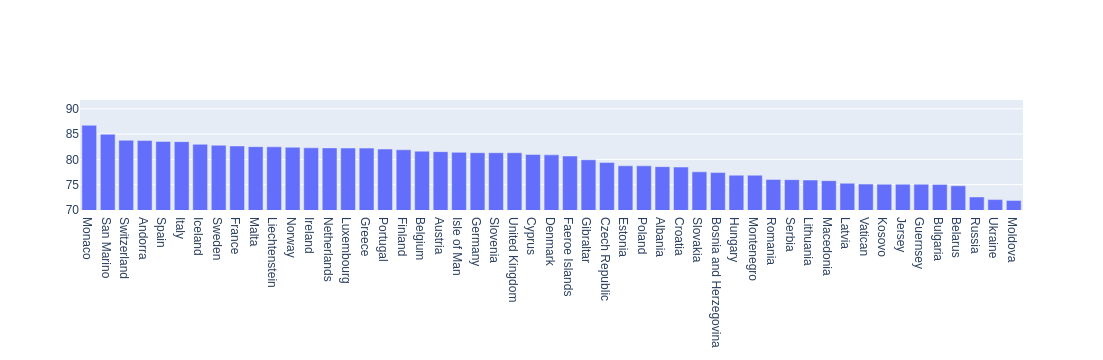

In [146]:
df = df_normal[df_normal["continent"] == "Europe"][["location", "life_expectancy"]].dropna().sort_values(by="life_expectancy", ascending=False)

fig = go.Figure()
fig.add_trace(go.Bar(x=df["location"],
                     y=df["life_expectancy"]))
fig.update_layout(yaxis=dict(range=[70, df["life_expectancy"].max() + 5]))
fig

6. Сравните распределения кол-ва смертей на 1000 человек в Европе и Африке

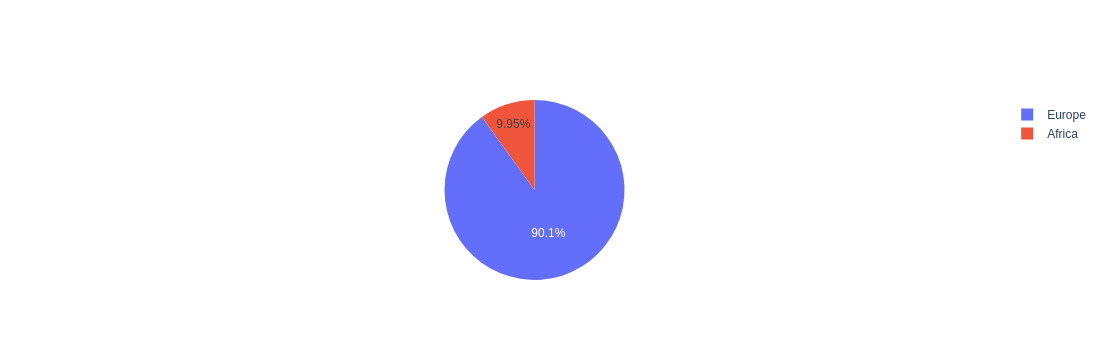

In [147]:
df = df_normal[(df_normal["continent"] == "Europe")
                | (df_normal["continent"] == "Africa")][["continent", "population", "total_deaths"]]
df = df.dropna(subset="total_deaths")
df["death_per_thousand"] = df["total_deaths"] / df["population"] * 10**3
df = df.groupby("continent")["death_per_thousand"].sum().reset_index()

fig = go.Figure()
fig.add_trace(go.Pie(labels=df["continent"],
                     values=df["death_per_thousand"]))